#### TASK:- Predicting Survival in the Titanic Data Set
- We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import scikitplot.metrics as skplt


In [2]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

- Note:-use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare

### EDA

In [4]:
features = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
X=titanic[features]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [5]:
Y= titanic["Survived"]
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
## Checking null values
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [7]:
Y.isnull().sum()

0

In [8]:
# Imputing Null values of Age with mean
X["Age"].fillna(X["Age"].mean(),inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [11]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


[Text(0.5, 1.0, 'Survived')]

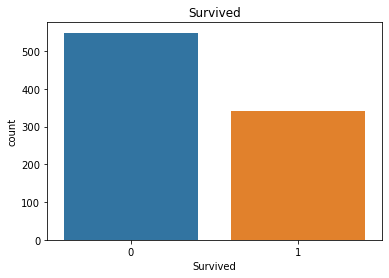

In [12]:
sns.countplot(x=titanic["Survived"]).set(title="Survived")

[Text(0.5, 1.0, 'Distribution of  Age')]

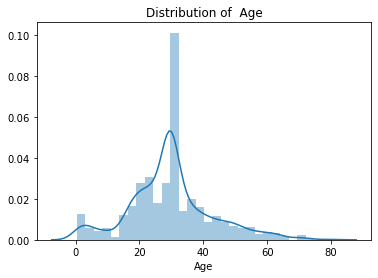

In [13]:
## let's see how data is distributed in Age column
sns.distplot(X["Age"]).set(title = "Distribution of  Age")

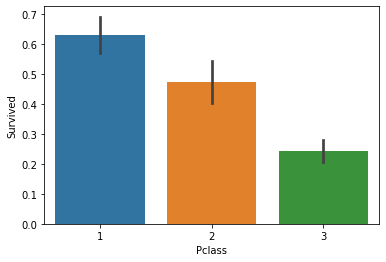

In [14]:
sns.barplot(x=titanic["Pclass"],y=titanic["Survived"])

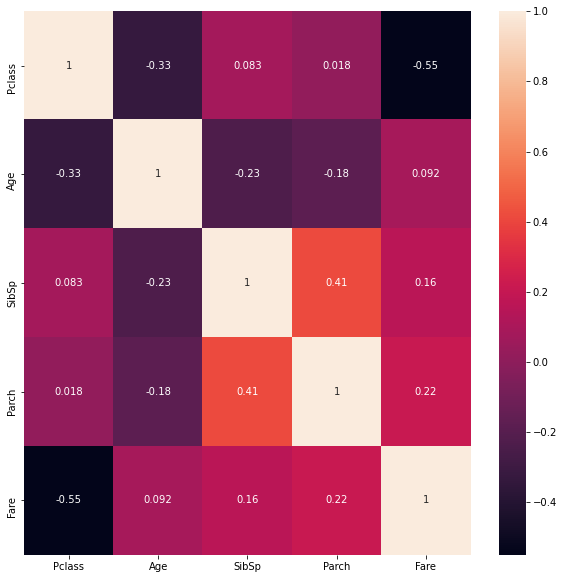

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True)


In [16]:
X['Sex']=pd.get_dummies(X['Sex']).values

<ipython-input-16-dfa6bbe023ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex']=pd.get_dummies(X['Sex']).values


In [17]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


### Model Building

In [18]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [19]:
print('Shape of X_train:',X_train.shape)
print('Shape of Y_train:',Y_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (623, 6)
Shape of Y_train: (623,)
Shape of x_test: (268, 6)
Shape of y_test: (268,)


In [20]:
## Apply Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
log_reg.score(x_test,y_test)

0.8134328358208955

## Applying Decesion Tree

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
clf.score(x_test,y_test)

0.7574626865671642

In [22]:
y_pred = clf.predict(x_test)

In [23]:
Accuracy = accuracy_score(y_test,y_pred)
Accuracy

0.7574626865671642

In [24]:
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[131,  26],
       [ 39,  72]], dtype=int64)

In [25]:
print("Classification report",classification_report(y_test,y_pred))

Classification report               precision    recall  f1-score   support

           0       0.77      0.83      0.80       157
           1       0.73      0.65      0.69       111

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268



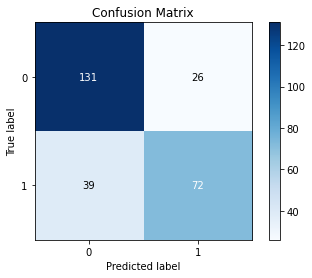

In [26]:
skplt.plot_confusion_matrix(y_test ,y_pred)

### Standardizing the X column before hyper tuning

In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_transform = scalar.fit_transform(X)

In [28]:
X_transform

array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 0.82737724,  1.35557354,  0.        ,  0.43279337,  2.00893337,
        -0.17626324],
       [-1.56610693, -0.73769513, -0.2846632 , -0.4745452 , -0.47367361,
        -0.04438104],
       [ 0.82737724, -0.73769513,  0.17706291, -0.4745452 , -0.47367361,
        -0.49237783]])

In [29]:
X_train,x_test,Y_train,y_test=train_test_split(X_transform,Y,test_size=0.3,random_state=42)

#### using Grid Search CV

In [31]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [32]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [33]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [34]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'random'}


In [35]:
grid_search.best_score_

0.8315354838709679

In [36]:
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =4, min_samples_leaf= 6,min_samples_split=7, splitter ='random')
clf2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       min_samples_split=7, splitter='random')

In [37]:
clf2.score(x_test,y_test)

0.8059701492537313

After Hyper parameters we can see there is increase in model accuracy